# Diagrama HR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'Calibri'})  # Cambiamos el tipo de fuente

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator,NullFormatter
from scipy import stats

In [2]:
data = np.loadtxt("C:/Users/Javier/Documents/Clases/Cuarto/TFG/Tablas HR/star_data.txt")
M_dat = data[:,1]
L_dat = data[:,2]
R_dat = data[:,3]
T_dat = data[:,4]
logL_dat = data[:,5]
logR_dat = data[:,6]
logT_dat = data[:,7]

In [3]:
# X=0.75 Y=0.22 Z=0.03
stars1 = np.loadtxt("C:/Users/Javier/Documents/Clases/Cuarto/TFG/Resultados/stars1.txt")
m1 = stars1[:,0]
R1 = stars1[:,1]
L1 = stars1[:,2]
Tc1 = stars1[:,3]*1e7
Teff1 = stars1[:,4]

# X=0.75 Y=0.20 Z=0.05
stars2 = np.loadtxt("C:/Users/Javier/Documents/Clases/Cuarto/TFG/Resultados/stars2.txt")
m2 = stars2[:,0]
R2 = stars2[:,1]
L2 = stars2[:,2]
Tc2 = stars2[:,3]*1e7
Teff2 = stars2[:,4]

# X=0.77 Y=0.20 Z=0.03
stars3 = np.loadtxt("C:/Users/Javier/Documents/Clases/Cuarto/TFG/Resultados/stars3.txt")
m3 = stars3[:,0]
R3 = stars3[:,1]
L3 = stars3[:,2]
Tc3 = stars3[:,3]*1e7
Teff3 = stars3[:,4]


In [5]:
M = 5/1.989
R = 11.64496/6.955
L = 45.48662/3.845
Tc = 1.85712*1e7
Teff = 8283

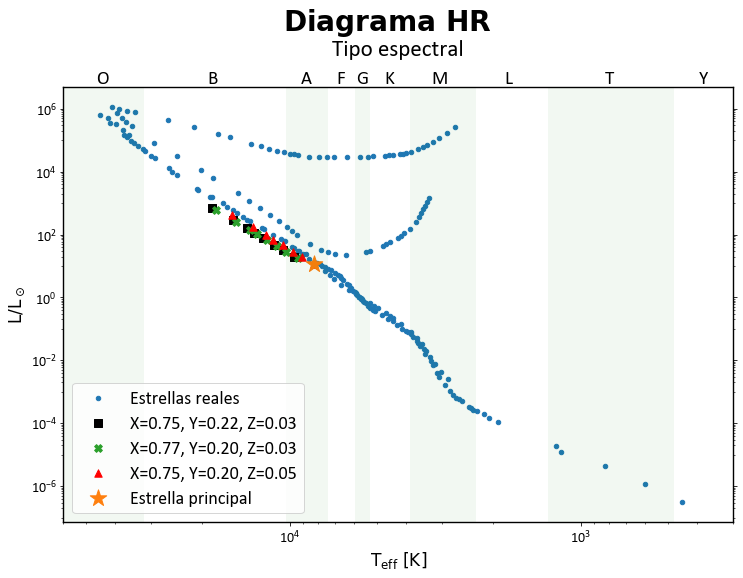

In [37]:
fig,ax = plt.subplots(figsize=(12,8))

fig.suptitle(r'$\mathbf{Diagrama \ HR}$',fontsize=28,y=1.02)

ax.set_title('Tipo espectral',fontsize=23,y=1.06)
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([6e4,3e2])

y_major = LogLocator(base=10,numticks=8)
ax.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base = 100, subs = np.arange(0, 100,10), numticks = 30)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())

x_major = LogLocator(base=10,numticks=8)
ax.xaxis.set_major_locator(x_major)
x_minor = LogLocator(base = 10, subs = np.arange(0, 10), numticks = 30)
ax.xaxis.set_minor_locator(x_minor)
ax.xaxis.set_minor_formatter(NullFormatter())


ax.tick_params(bottom=True,top=False,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=False,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(1.4)
ax.tick_params(axis='both',which='major',labelsize=14)


ax.scatter(T_dat,L_dat,s=20,label='Estrellas reales')
ax.scatter(Teff1,L1,s=50,c='k',label='X=0.75, Y=0.22, Z=0.03',marker='s')
ax.scatter(Teff3,L3,s=60,c='tab:green',label='X=0.77, Y=0.20, Z=0.03',marker='X')
ax.scatter(Teff2,L2,s=55,c='red',label='X=0.75, Y=0.20, Z=0.05',marker='^')

ax.scatter(Teff,L,s=300,c='tab:orange',marker='*',label='Estrella principal')

ax.axvspan(31650,10e5,color='green',alpha=0.05,linewidth=0)
ax.axvspan(10300,7410,color='green',alpha=0.05,linewidth=0)
ax.axvspan(5950,5290,color='green',alpha=0.05,linewidth=0)
ax.axvspan(3850,2300,color='green',alpha=0.05,linewidth=0)
ax.axvspan(1300,480,color='green',alpha=0.05,linewidth=0)

ax.set_xlabel(r'$\mathrm{ T_{eff} \ [K]} $',fontsize=17)
ax.set_ylabel(r'$\mathrm{ L/L_\odot} $',fontsize=17)
ax.legend(fontsize=18,loc=3)

ax.text(4.4e4,9.5e6,'O',fontsize=19,va='center',ha='center')
ax.text(1.85e4,9.5e6,'B',fontsize=19,va='center',ha='center')
ax.text(8.8e3,9.5e6,'A',fontsize=19,va='center',ha='center')
ax.text(6.7e3,9.5e6,'F',fontsize=19,va='center',ha='center')
ax.text(5.63e3,9.5e6,'G',fontsize=19,va='center',ha='center')
ax.text(4.55e3,9.5e6,'K',fontsize=19,va='center',ha='center')
ax.text(3.05e3,9.5e6,'M',fontsize=19,va='center',ha='center')
ax.text(1.78e3,9.5e6,'L',fontsize=19,va='center',ha='center')
ax.text(8e2,9.5e6,'T',fontsize=19,va='center',ha='center')
ax.text(3.8e2,9.5e6,'Y',fontsize=19,va='center',ha='center')


plt.show()

# Masa - Luminosidad

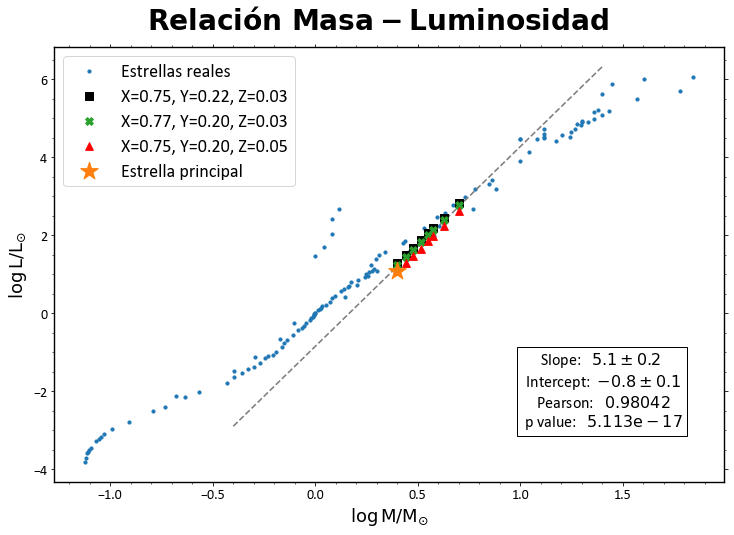

In [34]:
fig,ax = plt.subplots(figsize=(12,8))

fig.suptitle(r'$\mathbf{Relación \ Masa-Luminosidad}$',fontsize=28,y=0.95)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(1.4)
ax.tick_params(axis='both',which='major',labelsize=14)

ax.scatter(np.log10(M_dat[M_dat!=0]),logL_dat[M_dat!=0],c='tab:blue',s=10,label='Estrellas reales',zorder=1)

logM = np.log10(np.concatenate((m1,m2,m3),axis=None))
logL = np.log10(np.concatenate((L1,L2,L3),axis=None))
ajlin = stats.linregress(logM,logL)
ax.plot([-0.4,1.4],np.ones(2)*ajlin.intercept+np.ones(2)*ajlin.slope*[-0.4,1.4],color='tab:gray',zorder=2,linestyle='--',linewidth=1.6)

ax.scatter(np.log10(m1),np.log10(L1),c='k',marker='s',s=50,label='X=0.75, Y=0.22, Z=0.03',zorder=3)
ax.scatter(np.log10(m3),np.log10(L3),c='tab:green',marker='X',s=60,label='X=0.77, Y=0.20, Z=0.03',zorder=4)
ax.scatter(np.log10(m2),np.log10(L2),c='red',marker='^',s=60,label='X=0.75, Y=0.20, Z=0.05',zorder=5)
ax.scatter(np.log10(M),np.log10(L),c='tab:orange',s=340,marker='*',label='Estrella principal',zorder=10)


ax.text(1.4,-2,' Slope:   $5.1 \pm 0.2$  \n Intercept:  $- 0.8 \pm 0.1$ \n Pearson:   $0.98042$ \n p value:   $\mathrm{5.113e-17}$',fontsize=16,color='black',va='center',ha='center',bbox={'facecolor':'white','edgecolor':'black','pad':4})

ax.legend(fontsize=18)
ax.set_xlabel(r'$\log \mathrm{M/M_{\odot}}$',fontsize=18)
ax.set_ylabel(r'$ \log \mathrm{L/L_{\odot}} $',fontsize=18)

plt.show()

# Masa - Temperatura central

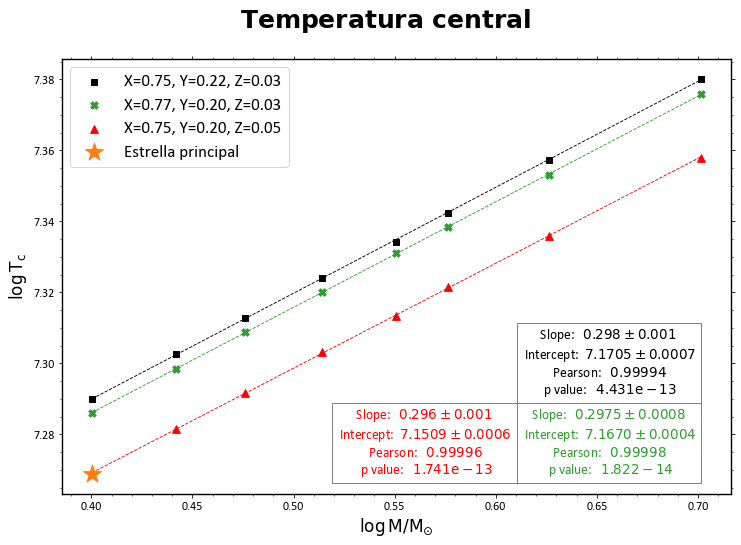

In [31]:
fig,ax = plt.subplots(figsize=(12,8))

fig.suptitle(r'$\mathbf{Temperatura \ central}$',fontsize=25,y=0.97)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(1.4)
ax.tick_params(axis='both',which='major',labelsize=12)

ax.scatter(np.log10(m1),np.log10(Tc1),s=35,color='k',marker='s',label='X=0.75, Y=0.22, Z=0.03')
ajlin=stats.linregress(np.log10(m1),np.log10(Tc1))
ax.plot(np.log10(m1),ajlin.intercept+ajlin.slope*np.log10(m1),color='k',linestyle='--',linewidth=0.9)

ax.scatter(np.log10(m3),np.log10(Tc3),s=55,color='tab:green',marker='X',label='X=0.77, Y=0.20, Z=0.03')
ajlin=stats.linregress(np.log10(m3),np.log10(Tc3))
ax.plot(np.log10(m3),ajlin.intercept+ajlin.slope*np.log10(m3),color='tab:green',linestyle='--',linewidth=0.9)


ax.scatter(np.log10(m2),np.log10(Tc2),s=60,color='red',marker='^',label='X=0.75, Y=0.20, Z=0.05')
ajlin=stats.linregress(np.log10(m2),np.log10(Tc2))
ax.plot(np.log10(m2),ajlin.intercept+ajlin.slope*np.log10(m2),color='red',linestyle='--',linewidth=0.9)

ax.scatter(np.log10(M),np.log10(Tc),350,color='tab:orange',marker='*',label='Estrella principal',zorder=10)

ax.text(0.656,7.30,' Slope:   $0.298 \pm 0.001$  \n Intercept:  $7.1705 \pm 0.0007$ \n Pearson:   $0.99994$ \n p value:   $\mathrm{4.431e-13}$',fontsize=13.5,color='black',va='center',ha='center',bbox={'facecolor':'white','edgecolor':'gray','pad':4})
ax.text(0.5648,7.2775,' Slope:   $0.296 \pm 0.001$  \n Intercept:  $7.1509 \pm 0.0006$ \n Pearson:   $0.99996$ \n p value:   $\mathrm{1.741e-13}$',fontsize=13.5,color='red',va='center',ha='center',bbox={'facecolor':'white','edgecolor':'gray','pad':4})
ax.text(0.656,7.2775,' Slope:   $0.2975 \pm 0.0008$  \n Intercept:  $7.1670 \pm 0.0004$ \n Pearson:   $0.99998$ \n p value:   $\mathrm{1.822-14}$',fontsize=13.5,color='tab:green',va='center',ha='center',bbox={'facecolor':'white','edgecolor':'gray','pad':4})

ax.set_xlabel(r'$\log \mathrm{M/M_{\odot}}$',fontsize=17)
ax.set_ylabel(r'$\log \mathrm{T_c}$',fontsize=17)
ax.legend(fontsize=17)

plt.show()

# Masa - Radio

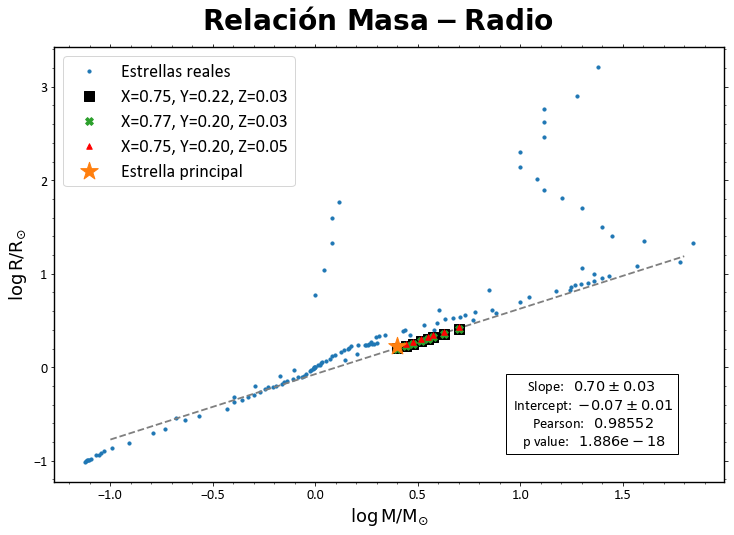

In [23]:
fig,ax = plt.subplots(figsize=(12,8))

fig.suptitle(r'$\mathbf{Relación \ Masa-Radio}$',fontsize=28,y=0.95)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(1.4)
ax.tick_params(axis='both',which='major',labelsize=14)



logM = np.log10(np.concatenate((m1,m2,m3),axis=None))
logL = np.log10(np.concatenate((R1,R2,R3),axis=None))
ajlin = stats.linregress(logM,logL)
ax.plot([-1,1.8],np.ones(2)*ajlin.intercept+np.ones(2)*ajlin.slope*[-1,1.8],color='tab:gray',linestyle='--',linewidth=1.8,zorder=2)

ax.scatter(np.log10(M_dat[M_dat!=0]),logR_dat[M_dat!=0],c='tab:blue',s=10,label='Estrellas reales',zorder=1)

ax.scatter(np.log10(m1),np.log10(R1),c='k',marker='s',s=85,label='X=0.75, Y=0.22, Z=0.03',zorder=7)
ax.scatter(np.log10(m3),np.log10(R3),c='tab:green',marker='X',s=60,label='X=0.77, Y=0.20, Z=0.03',zorder=8)
ax.scatter(np.log10(m2),np.log10(R2),c='red',marker='^',s=30,label='X=0.75, Y=0.20, Z=0.05',zorder=9)
ax.scatter(np.log10(M),np.log10(R),c='tab:orange',s=340,marker='*',label='Estrella principal',zorder=10)

ax.text(1.35,-0.5,' Slope:   $0.70 \pm 0.03$  \n Intercept:  $-0.07 \pm 0.01$ \n Pearson:   $0.98552$ \n p value:   $\mathrm{1.886e-18}$',fontsize=14.5,color='black',va='center',ha='center',bbox={'facecolor':'white','edgecolor':'black','pad':4})


ax.legend(fontsize=18)
ax.set_xlabel(r'$\log \mathrm{M/M_{\odot}}$',fontsize=18)
ax.set_ylabel(r'$ \log \mathrm{R/R_{\odot}} $',fontsize=18)


plt.show()